## **Data Analisys and Preprocessing with python**

The data analysis, is the first step that must be made on every datascience and data analytics project. Here, we must import the database and try to create an overview about the distribution and characteristics of each feature in order to understand how the data works, whats each feature means, it\`s magnitude and it\`s distribution. 

There are some libraries and some methods that helps us on this part of our project. 


In order to show some types of analyses and methods to understand and threat the data, we will use the **Iris dataset**.

In [1]:
# Here, we can import our main libraries for import, manipulate the data and analyse it on a table, or visualize it on a plot. 

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Importing our dataset in order to analyse it:

iris = pd.read_csv('iris.csv')

The first thing we may do to see how the data is presented, is to visualize some rows of it, in order to visualize the table structure.

In [26]:
iris.head() # "head()" method from pandas will show the first 5 rows from the dataset. We may use the "tail()" to show the last 5 rows if we want.

,sepal length,sepal width,petal length,petal width,class
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


One of pandas best ways to make a first impretion of our data is using the "describe()" method. This method will bring some statiscal informations for each column presented.

The "describe()" method is an statiscal description of our dataset. As a default parameter, it will only return the statistics analyses from the numeric features. If we have some cathegorical column, and want to see some informations from these data, we must use the "include='all'" parameter. This will pass the 'all' value to the method, and will include any type of data that exists on our dataset. Another option for these, is to select the columns we want to analyse: 

As a default output, the describe method will print the statistical data below:
* Count;
* Mean;
* std;
* min;
* percentiles: 25% / 50% / 70%
* max;

In [98]:

pd.options.display.float_format="{:.3f}".format # this line will set the pandas to show data with only 3 decimals.

print(f'Shape of our iris Dataset: {iris.shape} \n\n\nOverview about the database:')

iris.describe(percentiles=[.10, .25, .50, .75, .90], include='all') 
#The default values for percentiles are: 25%, 50% and 70%. But in order to have a better vision of our data, it was incremented the 10% and 90%.

Shape of our iris Dataset: (150, 5) 


Overview about the database:


,sepal length,sepal width,petal length,petal width,class
count,150.000,150.000,150.000,150.000,150
unique,nan,nan,nan,nan,3
top,nan,nan,nan,nan,Iris-versicolor
freq,nan,nan,nan,nan,50
mean,5.843,3.054,3.759,1.199,NaN
std,0.828,0.434,1.764,0.763,NaN
min,4.300,2.000,1.000,0.100,NaN
10%,4.800,2.500,1.400,0.200,NaN
25%,5.100,2.800,1.600,0.300,NaN
50%,5.800,3.000,4.350,1.300,NaN


From the output above, we may see some important informations from our data, like the minimum and maximum values, that can return an information about the variation that our data may have. The mean with the minimum and maximum values can give us an idea about the distribution for each feature.



## Distribution:

if we want to really see the data distribution for the features, we can use some options, like using plots from pandas library, and seaborn: 
* [pandas.Dataframe.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html);
* [pandas.Dataframe.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html);
* [sns.distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html);


array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

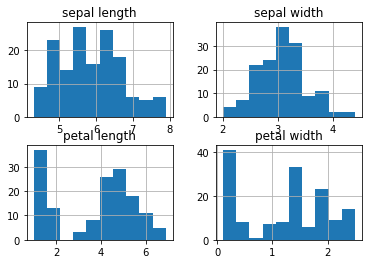

In [30]:
iris.hist()

<AxesSubplot:ylabel='Density'>

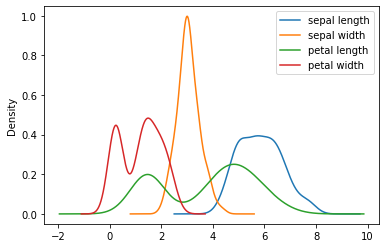

In [34]:
iris.plot.density()

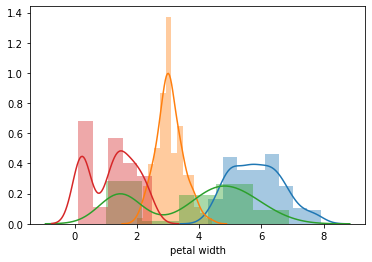

In [57]:
for col in iris.iloc[:, :-1].columns:
    sns.distplot(iris[col])

# The for used, do the same thing as the lines above:
   #sns.distplot(iris['sepal length'])
   #sns.distplot(iris['sepal width'])
   #sns.distplot(iris['petal length'])
   #sns.distplot(iris['petal width'])


## Missing Values:

Here, we will see how to deal with missing data on our dataset. There are some possibilities on "How to handle it".

* First one:
    We can simple drop the line of data with missing values from our dataset. This is a possibility when you have a huge dataset and it doesn\`t matter having a missing line or two;
      
* Second one:
    Replace the missing data with a new value, like: 
    * The mean value of the feature;
    * The mean value of a specífic subset of the data;
    * The most common data of that column;
    
Let\`s see an example of how to deal with this situation:

*Counting the missing values of the dataset for every column:*

In [27]:
#Counting number of missing values(First "sum()" will sum all lines for each column, and the second sum will sum both columns):
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In the case of the iris dataset, there are no missing data. So we will create a dataset in order to practice and see the solutions involved here:

In [67]:
# Creating the pandas Dataframe:

missing_dataset = pd.DataFrame([['A', 50], ['B', 62], [np.nan, 20], ['B', np.nan], ['B', 20], ['A', np.nan], ['B', 55]], columns=['GROUP', 'VALUE'])

missing_dataset

,GROUP,VALUE
0,A,50.000
1,B,62.000
2,NaN,20.000
3,B,nan
4,B,20.000
5,A,nan
6,B,55.000


In [68]:
# The "isnull()" method, will substitute the data inside the table by 1 (True) if is null, and 0 if it isn`t. 
# The "sum()" method will sum all the 1s on each column, and display it.

missing_dataset.isnull().sum()

GROUP    1
VALUE    2
dtype: int64

Now that we know how many null values exist in our table, we can apply some methods to deal with it, as explained before, we will explore the 3 methods:
* The mean value of the feature;
* The mean value of a specífic subset of the data;
* The most common data of that column;

* ### Drop all lines with nan values:

In [72]:
# Drop all rows from our dataset with null values using the dropna method from pandas:
# This method is not recommended when you`re dealing with a small dataset. 
drop_dataset = missing_dataset.dropna()
print(drop_dataset.isnull().sum(), '\n')
print(drop_dataset)

GROUP    0
VALUE    0
dtype: int64 

  GROUP  VALUE
0     A 50.000
1     B 62.000
4     B 20.000
6     B 55.000


* ### Replace nan with mean value from our column(in case of numeric columns) and most frequent value(in case of categorical data):

```python
    table1 = imputer(missing_values='NAN', strategy='mean', axis 0)
```

This library will use the mean of the hole column (Only non null values)

In [88]:
# Replace the NAN values with the mean from the hole column:
meancol_dataset = missing_dataset.copy() # Making a copy of our dataset;


#### Code to replace nan with the mean value from the hole column;
from sklearn.impute import SimpleImputer # Simpleimputer: replace data from our table based in some parameters;
imputer = SimpleImputer(fill_value=np.nan, strategy='mean') # Setting the kind of data to be changed and the strategy used;
meancol_dataset["VALUE"] = imputer.fit_transform(meancol_dataset.iloc[:, 1].values.reshape(-1, 1))


#### Code to replace nan from a categorical feature with the most frequent value from the hole column;
imputer = SimpleImputer(fill_value=np.nan, strategy='most_frequent') # Setting the kind of data we want to change and the strategy.
meancol_dataset["GROUP"] = imputer.fit_transform(meancol_dataset.iloc[:, 0].values.reshape(-1, 1))


meancol_dataset

,GROUP,VALUE
0,A,50.000
1,B,62.000
2,B,20.000
3,B,41.400
4,B,20.000
5,A,41.400
6,B,55.000


* ### Replace nan with mean value from a subset:
```python
    pd["Column"] = pd.groupby("column with groups")["Column with the values"].transform(lambda x: x.fillna(x.mean()))
```
* groupby("A")\["B"]: This will group all data of B by the categories in A;
* transform: this command applies an action on the data specified;
* lambda x: x.fillna(x.mean()): Here the code will extract the meanof each group (Mean, uses only non null values), and will aply this mean calculated on null values;

But first, we will substitute the nan from the categorical feature wiht the most frequent value.

In [90]:

meanSubset_dataset = missing_dataset.copy() # making a copy from our dataset

# Replacing the nan from GROUP column by the most frequent value from that column
imputer = SimpleImputer(fill_value=np.nan, strategy='most_frequent')
meanSubset_dataset["GROUP"] = imputer.fit_transform(meancol_dataset.iloc[:, 0].values.reshape(-1, 1))

# Now that the GROUP column doesn`t have a null value, we can apply the mean values by the group A and by the group B
meanSubset_dataset["VALUE"] = meanSubset_dataset.groupby("GROUP")["VALUE"].transform(lambda x: x.fillna(x.mean()))
meanSubset_dataset

,GROUP,VALUE
0,A,50.000
1,B,62.000
2,B,20.000
3,B,39.250
4,B,20.000
5,A,50.000
6,B,55.000


## Working with Categorical Values

Machine learning uses mathematical equations, and statiscal algorithms to analise and predict values. Because of that, the data must be presented to the algorithms as "numerical data". So, when we have on our data, **Categorical** values ("Text, name of country, sex, name of a group...."), it\`s important to transform this data into numerical values.

The sklearn library can be used again to transform categorical data into numerical. That\`s made by the method LabelEncoder of sklearn.preprocessing class. It receives the categorical data on the object created, and a class is made by each unique value:

EX: Brazil -> 0
    China -> 1
    USA -> 2
    Brazil ->0
    
Example of coding:
```python
    from sklearn.preprocessing import LabelEncoder
    LabelEncoder = LabelEncoder()
    LabelEncoder.fit(Dataset[:, column]) # Process the data into numerical classes
    Dataset[:, Column] = LabelEncoder.transform(Dataset[:, Column]) # Return the numerical classes in the same position of labels
    
    # After execute the model analysis, it`s possible to return the original labels:
     Label.Encoder.inverse_transform(Dataset[:, Column])
  
```
    
If a value is presented twice, it will receive the same value, as is treated as a category of data.
This method can create a problem in ML algorithms. As ML uses sthatistics, the algorithms can understand that the class "*USA*" has a higher value than "*China*" and "*Brazil*", and that\`s not the case. To make a turn around of this problem, it\`s possible to use a method called "*Dummy Encoding*", or as is most called, "*One Hot Encoding*".
### *One Hot Encoding:*

This is a technique used to drible the problem of give a class a highter value than others. This technique create a column for each label of the dataset, and uses binary state to indicate that a line of data has a label or not.


## Example of application

Here, we will use the meanSubset_dataset data:

In [103]:
print("Shape of the data imported:", meanSubset_dataset.shape,"\n")
meanSubset_dataset

Shape of the data imported: (7, 2) 



,GROUP,VALUE
0,A,50.000
1,B,62.000
2,B,20.000
3,B,39.250
4,B,20.000
5,A,50.000
6,B,55.000


The categorical data from this dataset is the *GROUP* column. Let\`s see the unique values from the class column.

In [104]:
meanSubset_dataset["GROUP"].value_counts()

B    5
A    2
Name: GROUP, dtype: int64

Let\`s use the One Hot Encoding to transform the categorical features into numerical. We will do this with the sklearn.preprocessing method to create the one hot encoding, and will transform our dataset with the sklearn.compose.ColumnTransformer;

In [105]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

# create the columntransform object:
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [0])], remainder='passthrough') 
# If remainder='passthrough' is not passed as an argument, the columns that were not specified for transformation, will be dropped;
# The name of the transformation will be 'encoder', and it will be made by the 'OneHotEncoder()' method/ transforming only the first column: [0]/ Remainder='passthrough' remainds that the remainded columns will be retrived in the output, even without any changes;

'''
- ColumnTransformer has an method called fit_transform(), that will fit the model and modify data in once. 
- It`s important for the future models that the data used, is given as a numpy array. For that we will use the command 
"np.array()"
'''
meanSubset_ohe = pd.DataFrame(ct.fit_transform(meanSubset_dataset))
print(meanSubset_ohe)

0     1      2
0 1.000 0.000 50.000
1 0.000 1.000 62.000
2 0.000 1.000 20.000
3 0.000 1.000 39.250
4 0.000 1.000 20.000
5 1.000 0.000 50.000
6 0.000 1.000 55.000


As we may see here, we transformed the A Group in 1 at first and sixth row.

### Using One Hot Encoding on our prediction values:

Now it\`s time to make the encoding to the values of **Purchased** column (Output of the model), but this time one hot encoding doesn\`t make sense, since our output data cannot have more than one column. So here, we will use the LabelEncoder to transform labels in numerical classes.

In order to do this, we will apply this technique on iris dataset, and transform the flower classes in numbers to be predicted:

In [106]:
from sklearn.preprocessing import LabelEncoder

iris_le = iris.copy()
le = LabelEncoder()
iris_le["class"] = le.fit_transform(iris["class"])

iris_le.head()

,sepal length,sepal width,petal length,petal width,class
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


In [110]:
iris["class"].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [118]:
# Lets see the Label Encoder mapping: 

for classes in iris["class"].unique().tolist():
    print(f'class: {classes} value: {le.transform([classes])[0]}')

class: Iris-setosa value: 0
class: Iris-versicolor value: 1
class: Iris-virginica value: 2


## Splitting the data into training and test sets

Now that we made some changes on the data to be readeble to models, it\`s time to split our data into training and testing sets(groups).

In [121]:
#Importing the method to split our data:
from sklearn.model_selection import train_test_split

X = iris_le.iloc[:, :-1].values # Copying the values from features to X array
Y = iris_le.iloc[:, -1].values # Copying the output values to Y array;

# here we will enter as parameters: the X and Y values of dataset, and the method will
  # return the Xtrain / Xtest / Ytrain / YTest to be used on our models

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
#Random_state = 1 makes the randomic lines choose for test data or X be the same lines for Y. The choose of lines are randomic.

print("Training data:\n",X_train.shape, "\n\n", "Test Data:\n",X_test.shape)
print("\n\n\nTraining output:\n",Y_train.shape, "\n\n", "Test output:\n",Y_test.shape)

Training data:
 (120, 4) 

 Test Data:
 (30, 4)



Training output:
 (120,) 

 Test output:
 (30,)


## Feature Scalling:

The last process that it\`s important for us to do in our dataset, is the Feature Scaling. This process will standardize the scale from each feature of our data. This is important, because some ML algorithms uses euclidian distance between the data to create a model, and if we have features with hight diference from others, the lowest values features will be irrelevant for the model because of it\`s magnitude.

There are two most common methods to use in this situations: 
* **Standardization**:
    Is a process that uses the distriubution of the dataset values of each feature, and brings all of then to the same scale based on a (Standard Normal distribution: mean = 0 and Standard Deviation = 1). This is possible with the fórmula:

  $$Standardized\_Value = \frac{(Orig\_Value-Mean(Column\_Feature))}{Standard\_Deviation(Column\_Feature)}$$

    
    
* **Normalization**:
    This method will bring the data of a feature to a range between 0 and 1, using the the min/max values of it\`s feature. It doen\`t cares about mean value and standard deviation. The mathematical form to do that is:
    
    $$Normalized\_Value = \frac{Old\_Value-min(Column\_Feature)}{max(Column\_Feature)-min(Column\_Feature)}$$
    
An important thing to keep in mind:
* *The Feature scaling must be done AFTER the split of training and test set*. Because, when we are training the model to predict some value with new data, the training and test sets must be totally apartted, even the scale. In order of that, the feature scalling must be done after the split of data. if we do this before the split, we may leak information of our test set to our training set, because, one will influence in the feature scalling of the other;
* The feature scalling must not be used on dummy variables (Encoded Labels), because if it\`s done, we will loose the tracking of what line of data represents wich country (In this case). So, it must be used only on our numercal features. 

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :]) 
#Here we will not fit the method with test values. Because we want to standardize the test values throught the ones we trained.
print("Training Values:\n", X_train)
print("\n\nTest Values:\n", X_test)

Training Values:
 [[ 0.31553662 -0.03612186  0.44748582  0.2345312 ]
 [ 2.2449325  -0.03612186  1.29803965  1.39642889]
 [-0.2873996  -1.240184    0.0505607  -0.15276803]
 [ 0.67729835 -0.51774672  1.01452171  1.13822941]
 [-0.04622511 -0.51774672  0.73100376  1.52552864]
 [-0.64916132  1.64956512 -1.31032543 -1.31466572]
 [-0.40798684 -1.72180885  0.10726429  0.10543146]
 [-0.76974857  0.92712784 -1.36702901 -1.31466572]
 [ 0.79788559 -0.51774672  0.44748582  0.36363094]
 [ 1.03906007 -1.240184    1.12792888  0.75093018]
 [ 1.15964732 -0.03612186  0.95781812  1.13822941]
 [-0.89033581  1.16794027 -1.36702901 -1.18556598]
 [ 0.19494938 -1.96262128  0.67430017  0.36363094]
 [ 0.5567111  -0.27693429  1.01452171  0.75093018]
 [ 0.91847283 -0.27693429  0.44748582  0.10543146]
 [ 2.2449325  -0.99937157  1.75166836  1.39642889]
 [-0.16681235  1.89037755 -1.19691825 -1.18556598]
 [-1.01092305  1.4087527  -1.36702901 -1.31466572]
 [-1.25209754 -0.03612186 -1.36702901 -1.18556598]
 [-0.76974857